In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
import pandas as pd
import numpy as np
import pickle

In [2]:
from sklearn import datasets
ds = datasets.load_digits()

In [3]:
df_images = pd.read_csv("data/13-X.csv", header=None)
df_labels = pd.read_csv("data/13-y.csv", header=None)
df_labels.columns = ["label"]

In [4]:
# number of rows in the dataframe
df_images.shape

(5000, 784)

There are 5000 images, and to plot a single image we want to slice out that row from the dataframe, reshape the list (vector) of pixels into a 28x28 matrix, and then plot that matrix with imshow

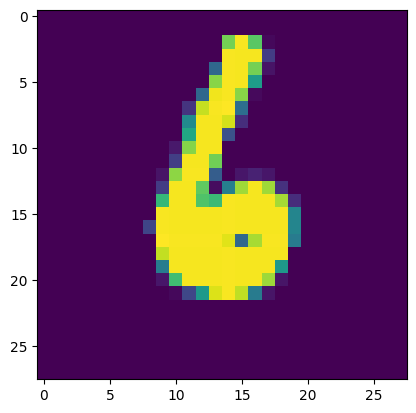

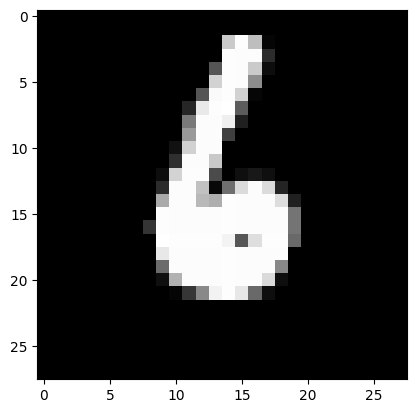

In [5]:
im = df_images.iloc[1020].values  # picked a row at random
im = np.reshape(im, (28, 28))
fig, ax = plt.subplots(1)
ax.imshow(im, interpolation="None")  # interpolation blurs to interpolate b/w pixels
fig, ax = plt.subplots(1)
ax.imshow(im, cmap=plt.get_cmap("gray"), interpolation="None")

#### Neural Nets for Multiclass Classification
##### Disclaimer: `sklearn` is not the best library for NN. For using off the shelf network architecture you should explore `keras`. For experimenting with novel architecture, I would recommend `tensorflow` or `pytorch`.
The kind of neural network that is implemented in sklearn is a Multi Layer Perceptron (MLP). The class MLPClassifier is the tool to use when you want a neural net to do classification for you.

In [6]:
from sklearn.neural_network import MLPClassifier

In [7]:
#help(MLPClassifier)

In [8]:
y = df_labels["label"].values
X = df_images.values

In [9]:
# initialize the classifer
classifier = MLPClassifier(solver="sgd")

In [10]:
classifier.hidden_layer_sizes = (16,)  # Just one hidden layer
classifier.activation = "logistic"

In [11]:
classifier.fit(X, y)

C:\Users\blain\Documents\Git\AI_Professional_Development\ai_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(16,), solver='sgd')

In [12]:
(y == classifier.predict(X)).mean()

0.934

#### Visualizing the Cost Function Trajectory
This didn't really work out of the box, we weren't able to converge even after hitting the maximum number of iterations in gradient descent (which was the default of 200). 

Text(0, 0.5, 'loss function')

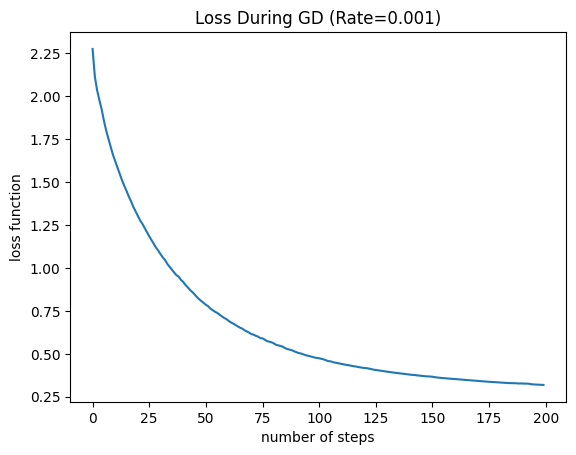

In [13]:
plt.plot(classifier.loss_curve_)
plt.title('Loss During GD (Rate=0.001)')
plt.xlabel("number of steps")
plt.ylabel("loss function")

In [14]:
classifier.learning_rate_init = .1
classifier.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(16,),
              learning_rate_init=0.1, solver='sgd')

In [15]:
(y == classifier.predict(X)).mean()

0.3438

Text(0, 0.5, 'loss function')

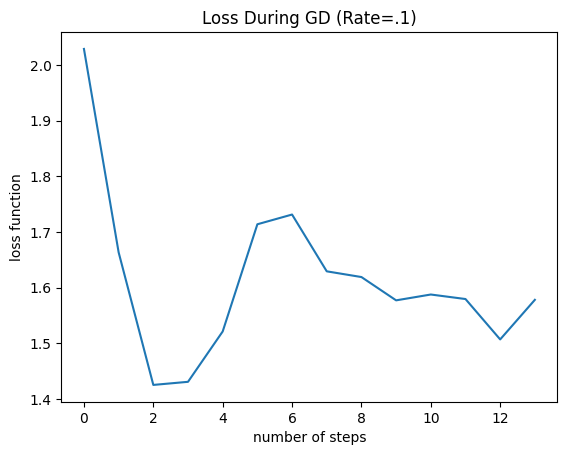

In [16]:
plt.plot(classifier.loss_curve_)
plt.title('Loss During GD (Rate=.1)')
plt.xlabel("number of steps")
plt.ylabel("loss function")

In [17]:
classifier.learning_rate_init = .001
classifier.max_iter = 400
classifier.fit(X, y)

C:\Users\blain\Documents\Git\AI_Professional_Development\ai_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(16,), max_iter=400,
              solver='sgd')

Text(0, 0.5, 'loss function')

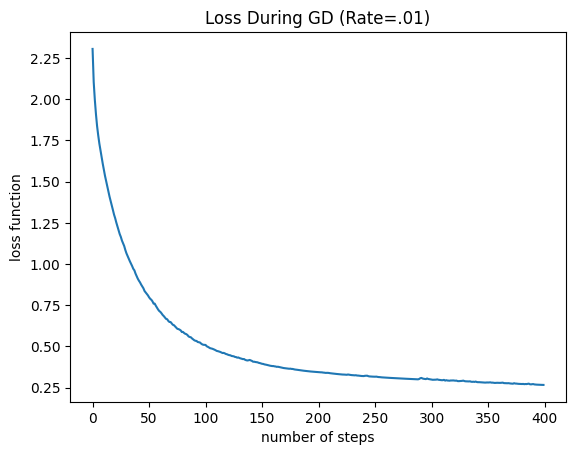

In [18]:
plt.plot(classifier.loss_curve_)
plt.title('Loss During GD (Rate=.01)')
plt.xlabel("number of steps")
plt.ylabel("loss function")

In [19]:
(y == classifier.predict(X)).mean()

0.932

In [20]:
df_labels["success"] = (y == classifier.predict(X))

for name, group in df_labels.groupby("label"):
    frac = sum(group["success"])/len(group)
    print("Success rate for labeling digit %i was %f " %(name, frac))

Success rate for labeling digit 0 was 0.965587 
Success rate for labeling digit 1 was 0.962298 
Success rate for labeling digit 2 was 0.924771 
Success rate for labeling digit 3 was 0.918750 
Success rate for labeling digit 4 was 0.958071 
Success rate for labeling digit 5 was 0.921109 
Success rate for labeling digit 6 was 0.961240 
Success rate for labeling digit 7 was 0.942688 
Success rate for labeling digit 8 was 0.918410 
Success rate for labeling digit 9 was 0.838912 


In [21]:
# training a complex model
classifier.hidden_layer_sizes = (16, 8)  # Just one hidden layer
classifier.activation = "logistic"

In [22]:
classifier.learning_rate_init = .01
classifier.max_iter = 400
classifier.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(16, 8),
              learning_rate_init=0.01, max_iter=400, solver='sgd')

In [23]:
(y == classifier.predict(X)).mean()

0.8148

Text(0, 0.5, 'loss function')

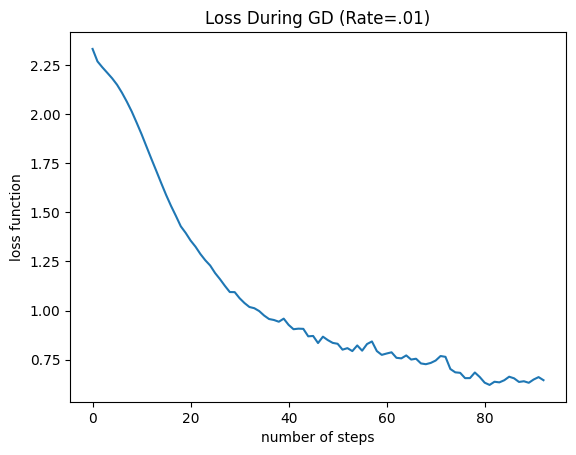

In [24]:
plt.plot(classifier.loss_curve_)
plt.title('Loss During GD (Rate=.01)')
plt.xlabel("number of steps")
plt.ylabel("loss function")

In [25]:
df_labels["success"] = (y == classifier.predict(X))

for name, group in df_labels.groupby("label"):
    frac = sum(group["success"])/len(group)
    print("Success rate for labeling digit %i was %f " %(name, frac))

Success rate for labeling digit 0 was 0.945344 
Success rate for labeling digit 1 was 0.931777 
Success rate for labeling digit 2 was 0.825688 
Success rate for labeling digit 3 was 0.825000 
Success rate for labeling digit 4 was 0.685535 
Success rate for labeling digit 5 was 0.680171 
Success rate for labeling digit 6 was 0.922481 
Success rate for labeling digit 7 was 0.865613 
Success rate for labeling digit 8 was 0.822176 
Success rate for labeling digit 9 was 0.604603 


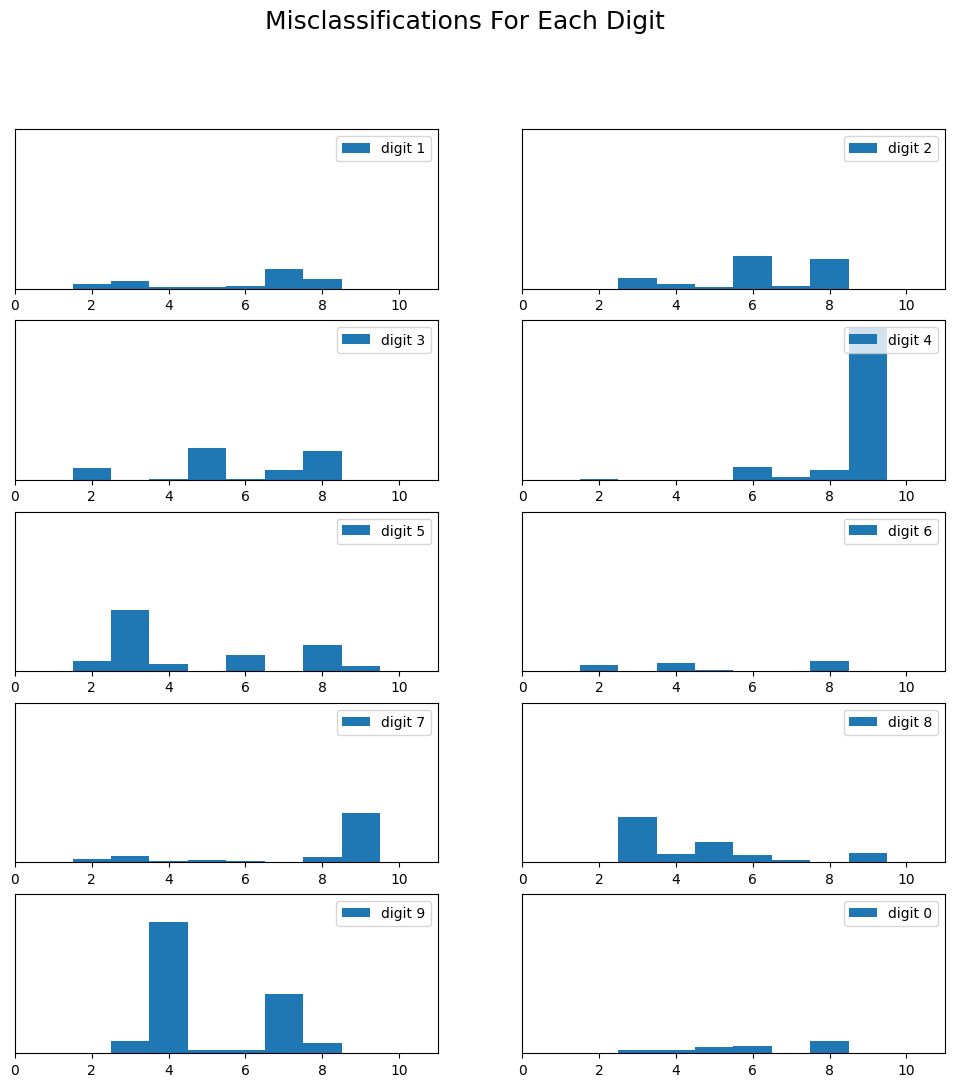

In [26]:
df_labels["assigned"] = classifier.predict(X)
fig, axs = plt.subplots(5, 2, sharex=False, sharey=True, figsize=(12,12))
fig.suptitle("Misclassifications For Each Digit", fontsize=18)
axs = axs.flatten()

for name, group in df_labels.groupby("label"):
    group = group[group["assigned"] != name]  # Get rid of correct predictions - they swamp the histogram!
    ax = axs[name-1]
    ax.hist(group["assigned"], label=("digit %i" %name), bins=np.arange(1, 11, 1)+0.5)  # Shift the bins to get labels aligned
    ax.set_xlim([0, 11])
    ax.legend(loc="upper right")
    ax.yaxis.set_visible(False)

#### References:
https://sdsawtelle.github.io/blog/output/week4-andrew-ng-machine-learning-with-python.html